Dear student,

I am asking you to do the following in this problem set. 

## Task 1: OLS in an Object-oriented Way

First, take the OLS code from the class material jupyter notebook and create a nice looking object oriented version for OLS estimation. The class is called "OLS". The constructor reads in the $y$ and $X$ variables. Ensure to add a constant to $X$. Add a function called "runOLS(...)" to that class. This function does the following: (i) compute regression beta and residual, (ii) volatility of the residual, (iii) standard errors and t-stat of beta estimates, (iv) adjusted $R^2$. Add a another function called "summaryStats()". This function executes the function "runOLS()" and displays the regression output for beta, t-stat, adjR2 and plots the time-series of the residual.

Hint: all of the necessary code is in the class notebook.

**Important:** use that OLS class for the upcoming tasks.

## Task 2: Cross-Sectional Equity Predictability

Second, you are going to work with the monthly equity return file "ES50_mthlyReturns_April2021.csv" which I have created in the aftermath of Topic_#1_GettingStarted. This data contains monthly log returns of European BlueChips. I want you to solve the following data challenges: 

### 2.1 Return Decomposition, $r = \mu + \epsilon$

Fit an AR(1) to the return on AI.PA and plot in one graph the time-series of $\mu$ and $\epsilon$. Interpret the graph, using the concept of $R^2$, the t-stat for the AR(1) coefficient, the variance of $y$ and the variance of $\epsilon$ and the variance of $\mu$. 

The praktomat will test (round output to four decimals and state results in monthly decimal units):
- ols estimate of AR(1) coef
- t-stat for AR(1) coef
- variance of r. Hint: var(y) = sum (r-mean(r)/(len(r)-1)
- variance of eps. Hint: var(eps) = eps.T *  eps / (len(r)-1-1)
- variance of mu. Hint: var(mu) = sum(mu-mean(mu)/(len(mu)-1)



### 2.2. Cross-Sectional adj-$R^2$

Tell me which of the European BlueChip stock return in "ES50_mthlyReturns_April2021.csv" shows evidence of at least weak predictability. Hint: I consider something weakly predictive, if the absolute value of the t-stat of the AR(1) loading is above 2. Also, how large is the adjusted $R^2$ for that stock?

The praktomat tests (round output to four decimals) and state results in monthly decimal units
- name: ""
- t-stat of AR(1) coef
- adjR2 of AR(1) regression




## Task 3: Market Return

You know by now that firm risk consists of systematic and idiosyncratic risk. You also know that the equal-weight portfolio is pretty well diversified. Hence, treat the equal-weight portfolio of the assets in "ES50_mthlyReturns_April2021.csv" as the market portfolio. Again, that is the return you earn for holding systematic Euro-area Equity Risk (systematic risk only). 


Analyze whether the market is predictable at the monthly frequency. Work with in-sample data only. Report t-stat, beta, adj-$R^2$. Decompose the market return into predictable ($\mu$) and unpredictable part($\epsilon$) and plot both into one graph. Interpret the graph.

The praktomat  tests (round output to four decimals and state results in monthly decimal units):
- ols estimate
- t-stat
- adjR2
- variance of r. Hint: var(y) = sum (r-mean(r)/(len(r)-1)
- variance of eps. Hint: var(eps) = eps.T eps / (len(r)-1-1)
- variance of mu. Hint: var(mu) = sum(mu-mean(mu)/(len(mu)-1)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class OLS:
    
    def __init__(self, X: np.ndarray, y: np.ndarray):
        # X  is (Nxp)
        # y is (Nx1)
        assert type(X) == np.ndarray
        assert type(y) == np.ndarray
        assert X.shape[0] == y.shape[0]
        self.X = X
        self.y = y
        
        # stuff
        cross_corr_matrix = X.T @ X # (pxp)
        inv_ccm = np.linalg.inv(cross_corr_matrix)
        self.inv_ccm = inv_ccm
        
    def runOLS(self) -> None:
        X = self.X
        y = self.y
        
        # Calculate the beta vector
        beta = self.beta = self.inv_ccm @ X.T @ y
        
        # Calculate STD of the residuals
        res = (y - X @ beta) # (nx1) - (nxpxpx1)
        self.res = res
        assert X.shape[1] == beta.shape[0] == len(beta)
        assert beta.shape[1] == 1
        var_res = (res.T @ res)/(len(y) - len(beta))
        self.var_eps = var_res
        std_res = np.sqrt(var_res)
        self.std_res = std_res
        
        # t-stat
        var_beta = var_res.squeeze() * self.inv_ccm
        #print(var_beta)
        std_beta = np.sqrt(var_beta.diagonal()).reshape(-1,1)
        assert beta.shape == std_beta.shape
        t_stat = beta / std_beta
        self.t_stat = t_stat       
            
        # R^2_adj
        var_y = (y - y.mean()).T @ (y - y.mean())/(len(y) - 1)
        self.var_y = var_y
        r_sq_adj = 1 - var_res/var_y
        self.r_sq_adj = r_sq_adj
        
        mu = y - res
        var_mu = ((mu - mu.mean()).T @ (mu - mu.mean()))/(len(y)-1)
        self.var_mu = var_mu
    
    def summaryStats(self):
        # output beta, t-stat, r^2
        print(f"{pd.DataFrame({'Beta': self.beta.squeeze(), 't_stat': self.t_stat.squeeze()})}"
              f"\n\n var(y): {self.var_y.squeeze()} "
              f"\n var(eps): {self.var_eps.squeeze()}"
              f"\n var(mu): {self.var_mu.squeeze()}"
              f"\n\nR squared adj: {self.r_sq_adj.squeeze()}"
              f"\nSTD of residuals: {self.std_res.squeeze()}\n")
        # plot time series of residuals
        f, ax = plt.subplots(1,1, figsize=(15,5))
        ax.plot(self.res)
        

In [3]:
data = pd.read_csv('ES50_mthlyReturns_April2021.csv')

In [4]:
data.loc[:, 'Date'] = pd.to_datetime(data['Date'])

In [5]:
data.set_index('Date', inplace=True)
assert data.index.is_monotonic_increasing

# Task 2.1

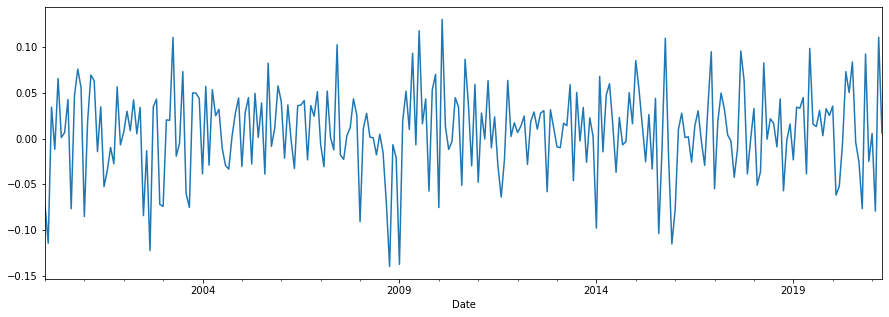

In [6]:
data.loc[:, 'AI.PA'].plot(figsize=(15,5))

In [7]:
X = data.iloc[:-1, data.columns.get_loc("AI.PA")].to_frame()

In [8]:
X = np.concatenate((np.ones(shape=(X.shape[0], 1)), X.values), axis=1)

In [9]:
y = data.iloc[1:, data.columns.get_loc("AI.PA")].values.reshape(-1,1)

In [10]:
assert X.shape[0] == y.shape[0]

In [11]:
model = OLS(X=X, y=y)

In [12]:
model.runOLS()

       Beta    t_stat
0  0.008928  2.963093
1 -0.094084 -1.511661

 var(y): 0.0022653254847890035 
 var(eps): 0.0022539217106887595
 var(mu): 2.0277481622640707e-05

R squared adj: 0.005034055448904451
STD of residuals: 0.04747548536548899



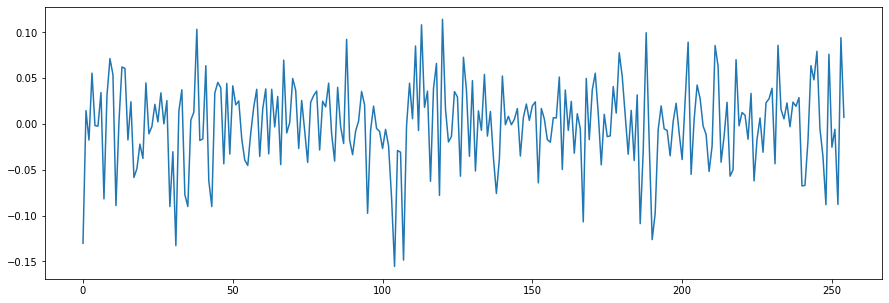

In [13]:
model.summaryStats()

# Task 2.2

In [16]:
for name in data.columns:
    X = data.iloc[:-1, data.columns.get_loc(name)].to_frame()
    X = np.concatenate((np.ones(shape=(X.shape[0], 1)), X.values), axis=1)
    y = data.iloc[1:, data.columns.get_loc(name)].values.reshape(-1,1)
    assert X.shape[0] == y.shape[0]
    model = OLS(X=X, y=y)
    model.runOLS()
    if np.abs(model.t_stat[1]) >= 2: # Remember to check the absolute t-stat!!!
        print(name)

MUV2.DE
VIV.PA


       Beta    t_stat
0  0.003159  0.592064
1 -0.157958 -2.543809

 var(y): 0.007405870490319754 
 var(eps): 0.007249717122662142
 var(mu): 0.00018469556105391933

R squared adj: 0.021085079446328536
STD of residuals: 0.08514527070050422



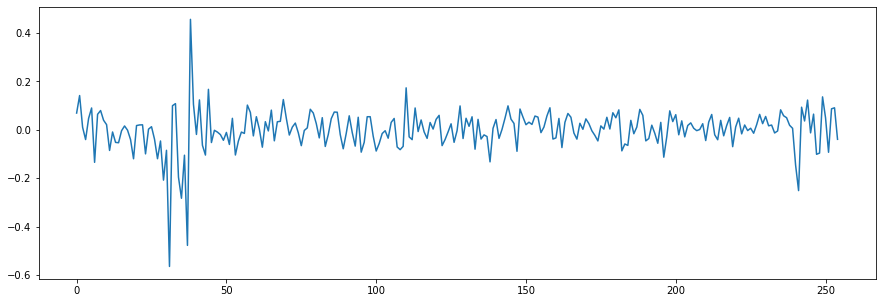

In [17]:
name = "MUV2.DE"
X = data.iloc[:-1, data.columns.get_loc(name)].to_frame()
X = np.concatenate((np.ones(shape=(X.shape[0], 1)), X.values), axis=1)
y = data.iloc[1:, data.columns.get_loc(name)].values.reshape(-1,1)
model = OLS(X=X, y=y)
model.runOLS()
model.summaryStats()

# Task 3

In [121]:
def add_constant(A):
    return np.concatenate((np.ones(shape=(A.shape[0], 1)), A.values), axis=1)

In [122]:
data.tail()

,ADS.DE,AI.PA,ALV.DE,ASML.AS,CS.PA,BBVA.MC,SAN.MC,BAS.DE,BAYN.DE,BMW.DE,...,SAN.PA,SAP.DE,SU.PA,SIE.DE,TEF.MC,FP.PA,URW.AS,DG.PA,VIV.PA,VOW.DE
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-31,0.104181,-0.025010,0.010067,0.088579,-0.010198,0.026367,0.048642,0.055114,0.009331,-0.013716,...,-0.073591,0.041206,0.014046,0.048535,-0.067975,-0.014763,0.081928,-0.049633,0.046556,0.079102
2021-01-31,-0.124208,0.005571,-0.068077,0.100203,-0.064129,-0.068727,-0.049677,-0.015159,0.024181,-0.028653,...,-0.019892,-0.013929,0.022153,0.084527,0.090958,0.007335,0.073422,-0.060548,-0.041012,0.036177
2021-02-28,0.097736,-0.079364,0.068778,0.057266,0.128052,0.200429,0.182149,0.059306,0.004099,0.021059,...,-0.017653,-0.026493,0.015587,0.026385,-0.007910,0.095063,-0.133408,0.116476,0.120763,0.104386
2021-03-31,-0.081833,0.110719,0.082811,0.105253,0.095529,-0.039212,-0.000173,0.044895,0.073823,0.212966,...,0.105690,0.022860,0.058492,0.089768,0.079301,0.052443,0.116577,0.015225,-0.020153,0.467678
2021-04-30,-0.035756,0.005869,-0.002999,0.045746,0.027582,0.067031,0.112788,-0.006612,0.034944,-0.059015,...,0.013440,0.125563,0.043934,0.025459,-0.007099,-0.047958,0.008016,0.069579,0.056245,-0.126350


In [123]:
data.shape

(256, 40)

In [124]:
eq_w_pf = data.aggregate(sum, axis=1)/data.shape[1]

In [125]:
X = eq_w_pf[:-1]

In [126]:
X = add_constant(X.to_frame())

In [127]:
y = eq_w_pf[1:].values.reshape(-1,1)

In [128]:
assert X.shape[0] == y.shape[0]

In [129]:
ols = OLS(X, y)

       Beta    t_stat
0  0.004639  1.343152
1  0.039774  0.634457

 var(y): 0.0030133318157624777 
 var(eps): 0.0030204365557556434
 var(mu): 4.7867425098091005e-06

R squared adj: -0.0023577688842633115
STD of residuals: 0.05495849848527199



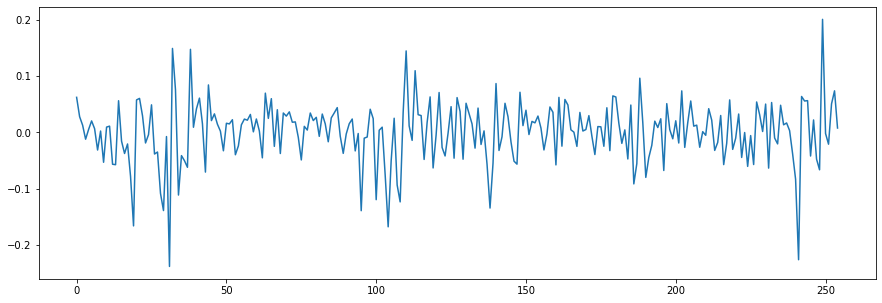

In [130]:
ols.runOLS()
ols.summaryStats()

True